# Part I - Exploration des Données sur les prêts de Prosper
## par Ousseynou Diop

## Introduction
Les banques recueillent beaucoup de données concernant leur utilisateur avant de leur délivrer un prêt.
Dans ce contexte on va étudier un [dataset](https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv%26amp;sa%3DD%26amp;ust%3D1581581520570000&sa=D&source=editors&ust=1659905511742826&usg=AOvVaw3ThKJ5Dc5EHpAfo4vO9yGa) contenant des informations sur les prets banquaires de 113937 personnes avec 81 variables
dont :
1. LoanStatus : Status actuel du prêt
2. BorrowerRate : Taux d'intérêt de l'emprunteur pour ce prêt 
3. StatedMonthlyIncome : Revenu mensuel déclaré par l'emprunteur
4. Term: La durée du prêt exprimée en mois 
5. ProsperRating(Alpha) : La note Prosper attribuée au moment de la création de la liste entre AA et HR
6. EmploymentStatus : Le statut d'emploi de l'emprunteur au moment ou il a créé la liste
7. LoanOriginalAmount : Montant initial du prêt

8. ProsperScore : Un score de risque personnalisé construit à partir des données historiques de Prosper . Le score va de 1 à 10 ,10  étant le meilleur ou le plus faible score de risque
9. BorrowerAPR : le taux annuel effectif global(TAEG) de l'emprunteur pour le prêt. 
10. ListingCategory : La catégorie de l'annonce que l'emprunteur a sélectionnée lors de la publication de son annonce 
11. EmploymentStatusDuration : La durée en mois du statut d'emploi au moment de la création de la fiche  
12. IsBorrowerHomeowner Un emprunteur sera classé comme propriétaire s'il a un pret hypothecaire dans son profil de crédit ou s'il fournit des documents confirmant qu'il est propriétaire
13. Occupation : La profession choisie par l'emprunteur au moment ou il a créé la liste
14. CurrentCreditLines : Nombre de lignes de crédit en cours au moment ou le profil de crédit a été établi

etc..........

## Wrangling préliminaire




In [247]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Chargement des données

In [248]:
data_pret= pd.read_csv("prosperLoanData.csv")
data_pret.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [249]:
data_pret.duplicated().sum()

0

In [250]:
data_pret.shape

(113937, 81)

In [251]:
data_pret.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [252]:
data_pret.query('BorrowerAPR > 0.43')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
18326,0161336483146123835D6A5,1795,2006-03-11 15:43:45.393000000,HR,36,Defaulted,2007-01-14 00:00:00,0.45857,0.4500,0.4325,...,-6.62,0.00,2829.24,2829.24,0.0,1.0,0,0,0.0,21
22195,5686336572505607862C0C7,1849,2006-03-12 13:44:15.060000000,HR,36,Chargedoff,2009-02-15 00:00:00,0.46201,0.4500,0.4325,...,-16.04,0.00,490.46,490.50,0.0,1.0,0,0,0.0,21
36018,844033650124564886B3EDC,690,2006-02-23 13:57:02.087000000,HR,36,Completed,2006-03-14 00:00:00,0.51229,0.4975,0.4925,...,-0.29,0.00,0.00,0.00,0.0,1.0,0,0,0.0,9
56761,A79D33661366830833F3EF5,2231,2006-03-16 19:30:16.753000000,HR,36,Defaulted,2006-09-19 00:00:00,0.50633,0.4975,0.4800,...,-1.27,0.00,2964.88,2964.88,0.0,1.0,0,0,0.0,21
82043,BBED336465905564254DC8B,1112,2006-03-02 19:00:17.593000000,HR,36,Defaulted,2006-09-05 00:00:00,0.48873,0.4800,0.4750,...,-1.27,0.00,2963.64,2963.64,0.0,1.0,0,0,0.0,20
103973,95ED3365915044756AB754F,1366,2006-03-06 22:36:53.753000000,HR,36,Defaulted,2006-10-08 00:00:00,0.45857,0.4500,0.4325,...,-3.16,-3.75,2764.01,2764.01,0.0,1.0,0,0,0.0,22


### Explication choix des variables pour notre etudes
Comme notre jeux de données comporte 81 on va se focaliser sur 14 d'entre eux que nous jugeons plus pertinent selon notre compréhension et essayer de faire notre étude sur ces variables voir leur relations et en tirer le maximum d'information 
Les variables pour notre étude sont :

LoanStatus ,

 BorrowerRate, 
 
 StatedMonthlyIncome,
 
 Term,
 
 ProsperRating(Alpha),
 
  EmploymentStatus , 
  
  LoanOriginalAmount,
  
  ProsperScore, 
  
  BorrowerAPR, 
  
  ListingCategory,
  
  EmploymentStatusDuration , 
  
  IsBorrowerHomeowner

  CurrentCreditLines 

  Occupation

  




## Création du dataset 
avec les variables listé en haut


In [253]:
#Liste comportant l'ensemble des variables
list_col=["LoanStatus" , "BorrowerRate", "StatedMonthlyIncome","Term","ProsperRating (Alpha)", "EmploymentStatus" , "LoanOriginalAmount","ProsperScore", "BorrowerAPR", "ListingCategory (numeric)","EmploymentStatusDuration" , "IsBorrowerHomeowner", "CurrentCreditLines","Occupation"]
#nouvelle dataframe
data_pret_etudes= data_pret[list_col]

In [254]:
data_pret_etudes.shape

(113937, 14)

In [255]:
data_pret_etudes.head()

,LoanStatus,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanOriginalAmount,ProsperScore,BorrowerAPR,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,Occupation
0,Completed,0.1580,3083.333333,36,NaN,Self-employed,9425,NaN,0.16516,0,2.0,True,5.0,Other
1,Current,0.0920,6125.000000,36,A,Employed,10000,7.0,0.12016,2,44.0,False,14.0,Professional
2,Completed,0.2750,2083.333333,36,NaN,Not available,3001,NaN,0.28269,0,NaN,False,NaN,Other
3,Current,0.0974,2875.000000,36,A,Employed,10000,9.0,0.12528,16,113.0,True,5.0,Skilled Labor
4,Current,0.2085,9583.333333,36,D,Employed,15000,4.0,0.24614,2,44.0,True,19.0,Executive


In [256]:
data_pret_etudes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113937 non-null  object 
 1   BorrowerRate               113937 non-null  float64
 2   StatedMonthlyIncome        113937 non-null  float64
 3   Term                       113937 non-null  int64  
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   EmploymentStatus           111682 non-null  object 
 6   LoanOriginalAmount         113937 non-null  int64  
 7   ProsperScore               84853 non-null   float64
 8   BorrowerAPR                113912 non-null  float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  EmploymentStatusDuration   106312 non-null  float64
 11  IsBorrowerHomeowner        113937 non-null  bool   
 12  CurrentCreditLines         106333 non-null  float64
 13  Occupation                 11

In [257]:
data_pret_etudes.describe().T

,count,mean,std,min,25%,50%,75%,max
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.134000,0.184000,0.25000,4.975000e-01
StatedMonthlyIncome,113937.0,5608.025568,7478.497275,0.00000,3200.333333,4666.666667,6825.00000,1.750003e+06
Term,113937.0,40.830248,10.436212,12.00000,36.000000,36.000000,36.00000,6.000000e+01
LoanOriginalAmount,113937.0,8337.013850,6245.800580,1000.00000,4000.000000,6500.000000,12000.00000,3.500000e+04
ProsperScore,84853.0,5.950067,2.376501,1.00000,4.000000,6.000000,8.00000,1.100000e+01
BorrowerAPR,113912.0,0.218828,0.080364,0.00653,0.156290,0.209760,0.28381,5.122900e-01
ListingCategory (numeric),113937.0,2.774209,3.996797,0.00000,1.000000,1.000000,3.00000,2.000000e+01
EmploymentStatusDuration,106312.0,96.071582,94.480605,0.00000,26.000000,67.000000,137.00000,7.550000e+02
CurrentCreditLines,106333.0,10.317192,5.457866,0.00000,7.000000,10.000000,13.00000,5.900000e+01


<AxesSubplot:>

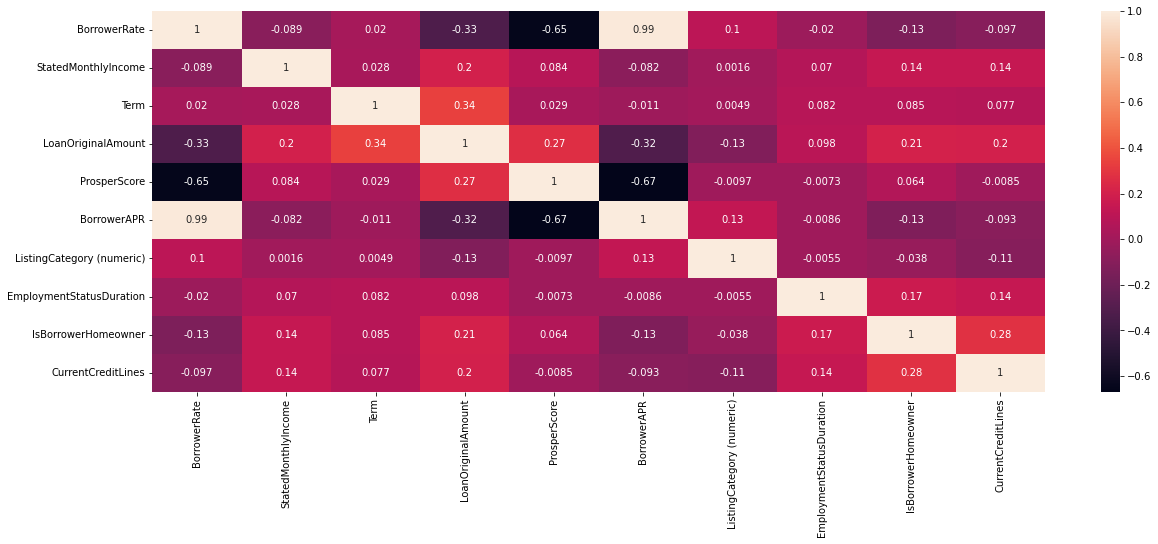

In [258]:
plt.figure(figsize=(20,7))
sns.heatmap(data_pret_etudes.corr(),annot=True)

In [259]:
#Regarder les lignes dupliqué
data_pret_etudes.duplicated().sum()

28

In [260]:
# Les données manquantes
data_pret_etudes.isna().sum().sum()

79265

In [261]:
#les categorie de la variable LoanStatus
data_pret_etudes.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [262]:
#Les categories de la variables ProsperRating (Alpha)
data_pret_etudes["ProsperRating (Alpha)"].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [263]:
#Les categories de la variables EmploymentStatus
data_pret_etudes.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [264]:
#Les categories de la variable Occupation
len(data_pret_etudes.Occupation.unique())

68

### Quelle est la structure de votre jeu de données
Notre jeu de données est composé de 113937 lignes et de 14 colonnes après filtrage pour notre étude dont :

1 de type bool (IsBorrowerHomeowner)

9 de type entier(BorrowerRate,StatedMonthlyIncome,Term,LoanOriginalAmount,ProsperScore,BorrowerAPR,ListingCategory (numeric),EmploymentStatusDuration,CurrentCreditLines)


Les variables de types object (LoanStatus ,ProsperRating (Alpha),EmploymentStatus,Occupation) 

(Pire)---------->(meilleur)

ProsperRating (Alpha) : HR , E ,D ,C ,B , A ,AA

EmploymentStatus : Not available , Not employed,Other,Retired , Part-time ,Full-time , Self-employed,Employed







Possède 28 lignes dupliquer ,79265 enregistrements manquantes



### Quelle(s) est (sont) la (les) principale(s) caractéristique(s) d'intérêt dans votre ensemble de données ?
Les variables qui m'intéressent le plus sont de voir comment on détermine ou on évalue le taux annuel effectif global (TAEG) pour un prêt  aussi comment le banque fait pour donner un score à un demandeur et le statut du pres aussi .




### Quelles sont les caractéristiques de l'ensemble de données qui, selon vous, vous aideront à mener votre enquête sur la ou les caractéristiques qui vous intéressent ?

Nous allons explorer  **les variables StatedMonthlyIncome , Term , ListingCategory, ProsperRating (Alpha) , EmploymentStatusDuration,Occupation EmploymentStatusDuration EmploymentStatus, CurrentCredit  Lines, IsBorrowerHomeowner**  pour voir est ce qu'il y a une dependance ou une influence sur nos deux variables citées en haut(TAEG,ProsperScore,LoanStatus).



## Exploration univariée


Je commence l'exploration par regarder la distribution de la variable d'interet : BorrowerAPR

In [265]:
#Regarder les données manquantes pour cette variable
data_pret_etudes.BorrowerAPR.isna().sum()

25

> Pour la variable BorrewerAPR(TAEG) on n'a 25 données manquantes

In [266]:
# On supprime ces lignes
data_pret_etudes = data_pret_etudes[~data_pret_etudes.BorrowerAPR.isna()]

In [267]:
# Regarder la description de notre variable BorrowerAPR
data_pret_etudes.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

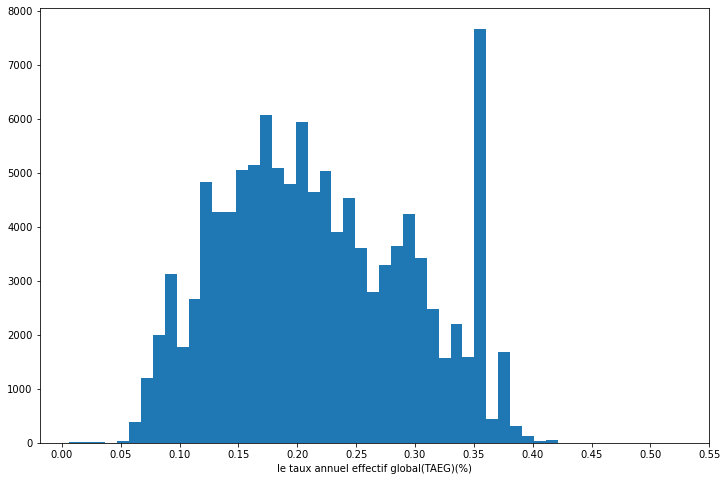

In [268]:
# Tracer de la distribution de BorrowerAPR
plt.figure(figsize=(12,8))
plt.hist(data=data_pret_etudes,x='BorrowerAPR',bins=50);
plt.xticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55])
plt.xlabel("le taux annuel effectif global(TAEG)(%)")
plt.show()


En jouant sur le parametre bins on constate que la distribution de la variable presente des pic de valeurs au alentour de 0.35 % plus eleve et des pics un peut moins eleve au alentour de l'intervalle 0.15 et 0.25 . On peut voir aussi que peut de valeur on un taux compris inferieur a 0.05 et peut d'autre on un taux plus grand que 0.42 qui depasse de loin les valeur normale

> Esseyons de voir les teag > 0.43

In [269]:
data_pret_etudes.query('BorrowerAPR > 0.43')

,LoanStatus,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanOriginalAmount,ProsperScore,BorrowerAPR,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,Occupation
18326,Defaulted,0.4500,10000.000000,36,NaN,NaN,3000,NaN,0.45857,0,NaN,False,NaN,NaN
22195,Chargedoff,0.4500,2916.666667,36,NaN,NaN,1789,NaN,0.46201,0,NaN,False,NaN,NaN
36018,Completed,0.4975,2838.000000,36,NaN,NaN,1500,NaN,0.51229,0,NaN,False,NaN,NaN
56761,Defaulted,0.4975,0.000000,36,NaN,NaN,3000,NaN,0.50633,0,NaN,False,NaN,NaN
82043,Defaulted,0.4800,1583.333333,36,NaN,NaN,3000,NaN,0.48873,0,NaN,False,NaN,NaN
103973,Defaulted,0.4500,3750.000000,36,NaN,NaN,2800,NaN,0.45857,0,NaN,False,NaN,NaN


On remarque pour ces personnes la plus parts des informations sont manquantes ou non specifier . Et la plus part on un Term = 36 Mois

## Definition 
D'une fonction pour tracer des diagramme en barre

In [270]:

def diag_bar(col):
    plt.figure(figsize=(20,8))
    color = sns.color_palette()[0]
    #ordre=data_pret_etudes.col.value_counts().index.sort_values()
    sns.countplot(data=data_pret_etudes,x=col,color=color)
    plt.xlabel(col)
    #plt.xticks(rotation=90)
    plt.title("distribution de " + col)

> Pour l'autre variable cible regardons sa distribution ProsperScore


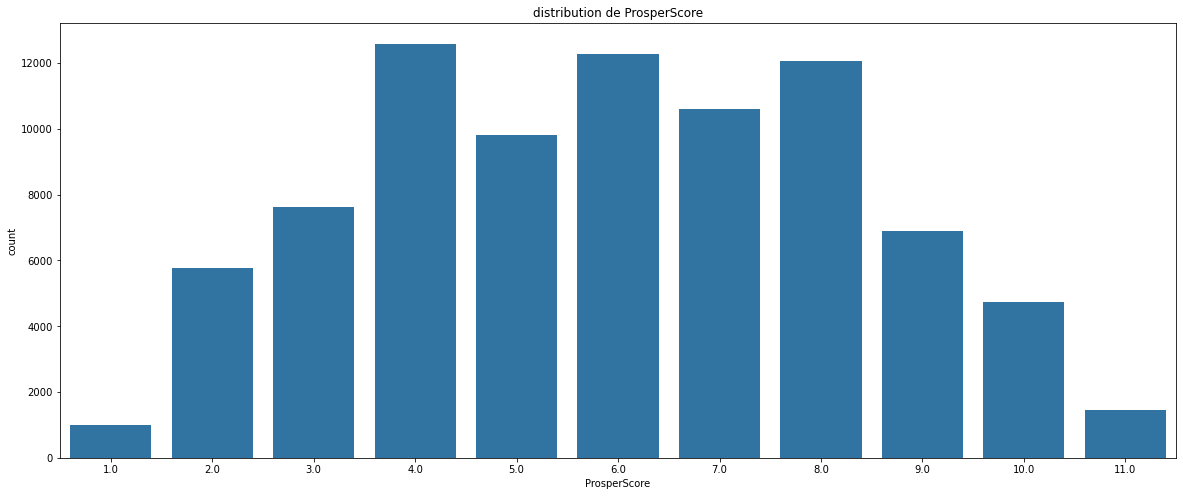

In [271]:

diag_bar('ProsperScore')

On voit que  dans la distribition de la variable  le score le plus representé est 4 suivie de 6 et de 8 .
On note des score de 11 dans notre jeux de donnée alors que la note maximal est de 10 donc 11 est une valeur incorrecte

> Regardonon les scores de 11  

In [272]:
data_pret_etudes.query('ProsperScore==11')

,LoanStatus,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanOriginalAmount,ProsperScore,BorrowerAPR,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,Occupation
9,Current,0.0629,3333.333333,36,AA,Employed,10000,11.0,0.07620,7,269.0,True,17.0,Food Service
69,Current,0.1139,2700.000000,60,A,Self-employed,9000,11.0,0.13636,1,12.0,True,5.0,Investor
158,Current,0.0809,6666.666667,36,AA,Employed,5500,11.0,0.09469,6,22.0,False,9.0,Tradesman - Mechanic
224,Current,0.1099,33333.333333,36,A,Employed,30000,11.0,0.13799,1,114.0,True,16.0,Sales - Commission
236,Current,0.0605,4083.333333,36,AA,Employed,9000,11.0,0.06726,1,105.0,True,11.0,Tradesman - Mechanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113762,Current,0.1139,9083.333333,60,A,Employed,25000,11.0,0.13636,20,41.0,True,10.0,Other
113784,Current,0.0990,8583.333333,36,A,Employed,15000,11.0,0.12691,1,158.0,True,10.0,Other
113855,Current,0.1189,6666.666667,36,A,Full-time,8500,11.0,0.14751,3,89.0,False,6.0,Food Service Management
113881,Current,0.1730,8166.666667,60,C,Employed,19432,11.0,0.19681,7,37.0,True,12.0,Professional


> Suppression de ces données

In [273]:
#masque pour la suppression des données avec un score de 11
data_pret_etudes=data_pret_etudes.query('ProsperScore!=11')
data_pret_etudes.shape

(112456, 14)

> Etude de la variable LoanStatus 

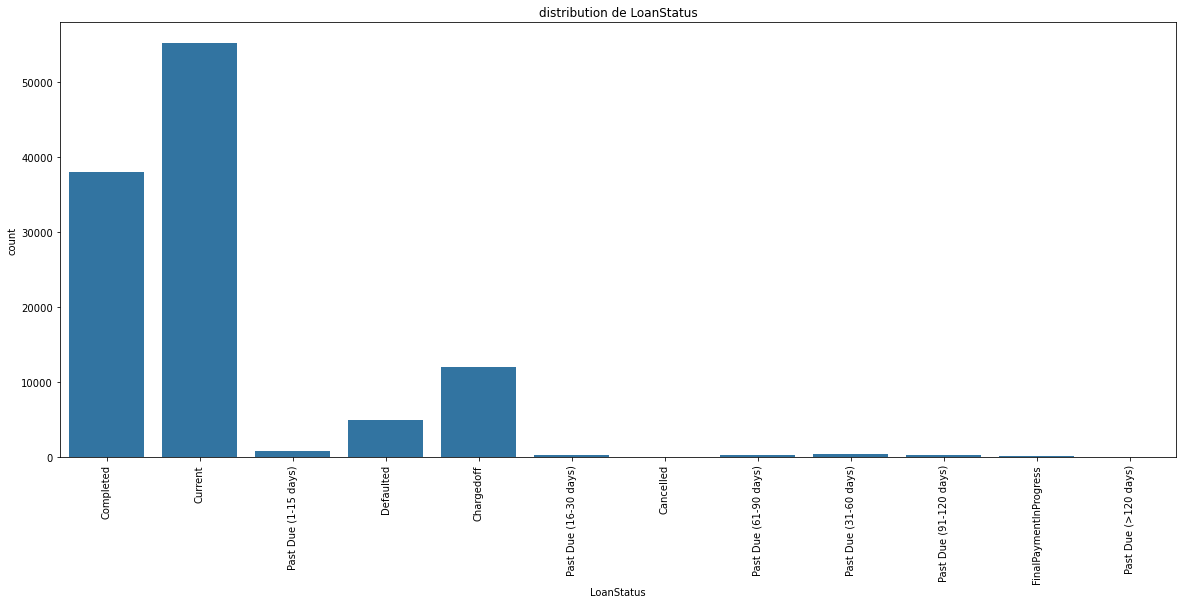

In [274]:
#Tracer du diagramme en barre de la variable
diag_bar('LoanStatus')
plt.xticks(rotation=90)
plt.show()

On constate que la categorie Current est plus representé suivie de la categorie Completed .
On n'a une faible repartion suivant les classes Past Due


ETUDE DE LA VARIABLE ProsperRating (Alpha)


In [275]:
#Conversion du type en categorie
list_a = ["HR" , "E" ,"D" ,"C" ,"B" , "A" ,"AA"]
cart_ordr = pd.api.types.CategoricalDtype( list_a,ordered=True )
data_pret_etudes["ProsperRating (Alpha)"].astype(cart_ordr)

0         NaN
1           A
2         NaN
3           A
4           D
         ... 
113932      C
113933      A
113934      D
113935      C
113936      A
Name: ProsperRating (Alpha), Length: 112456, dtype: category
Categories (7, object): ['HR' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA']

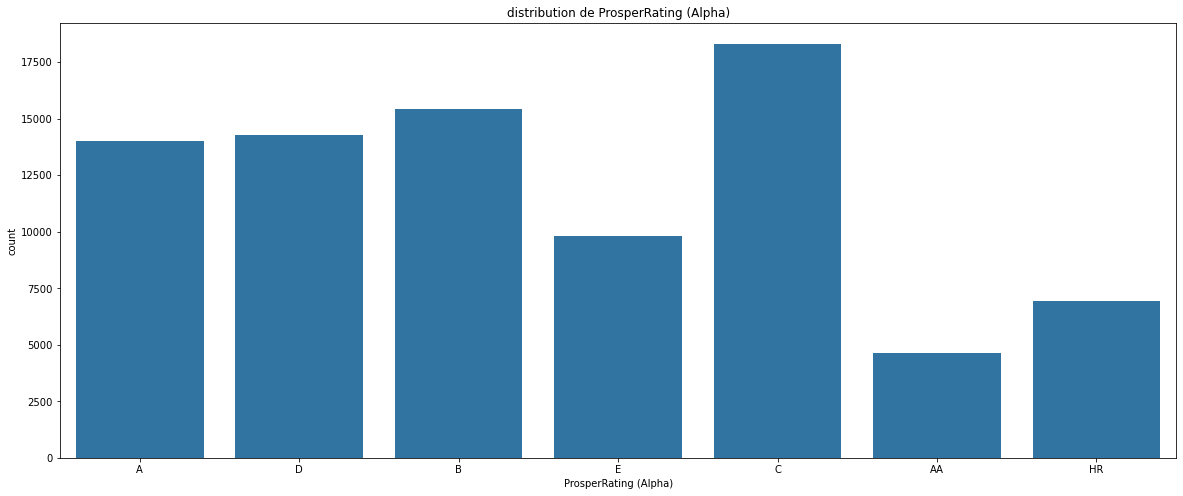

In [276]:
#tracer du diagramme en barre
diag_bar('ProsperRating (Alpha)')

On voit que la classe C est plus representer suivie de la classe B .

Etudes de la distribution de la variable EmploymentStatus

In [277]:
# conversion du type de la variable EmploymentStatus en un type categoriel
ordre_list = ["Not available", "Not employed","Other","Retired" , "Part-time" ,"Full-time" , "Self-employed","Employed"]
category_list=pd.api.types.CategoricalDtype(ordre_list,ordered=True)
data_pret_etudes.EmploymentStatus.astype(category_list)

0         Self-employed
1              Employed
2         Not available
3              Employed
4              Employed
              ...      
113932         Employed
113933         Employed
113934         Employed
113935        Full-time
113936         Employed
Name: EmploymentStatus, Length: 112456, dtype: category
Categories (8, object): ['Not available' < 'Not employed' < 'Other' < 'Retired' < 'Part-time' < 'Full-time' < 'Self-employed' < 'Employed']

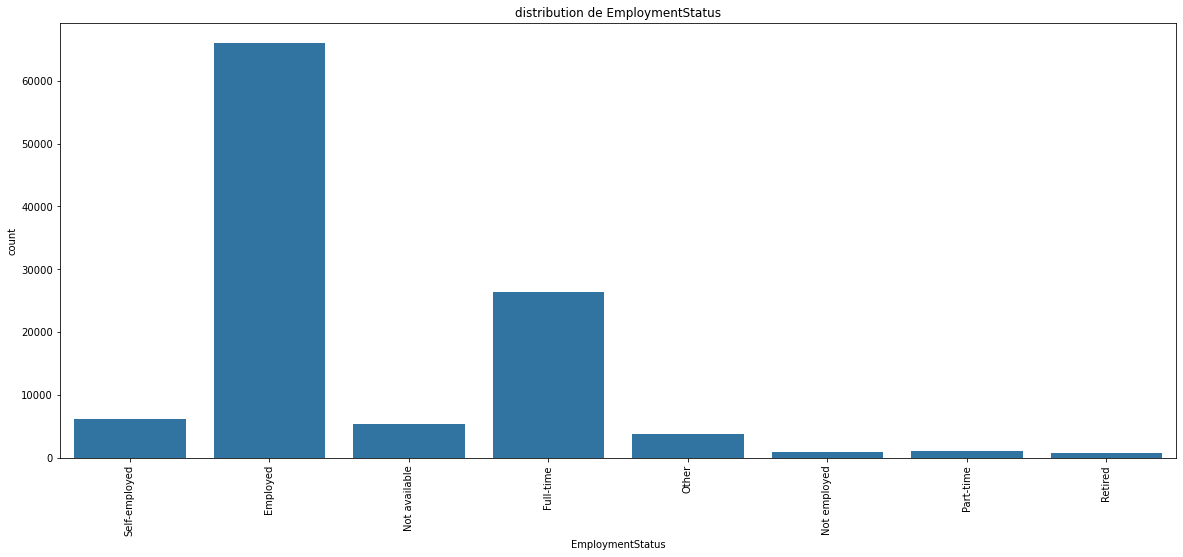

In [278]:
diag_bar('EmploymentStatus')
plt.xticks(rotation=90)
plt.show()

On constate que parmis les demandeur de pret la majeur partie d'entre eux sont des employés

Pour l'etude des variables StatedMonthlyIncome , Term , EmploymentStatusDuration,LoanOriginalAmount 

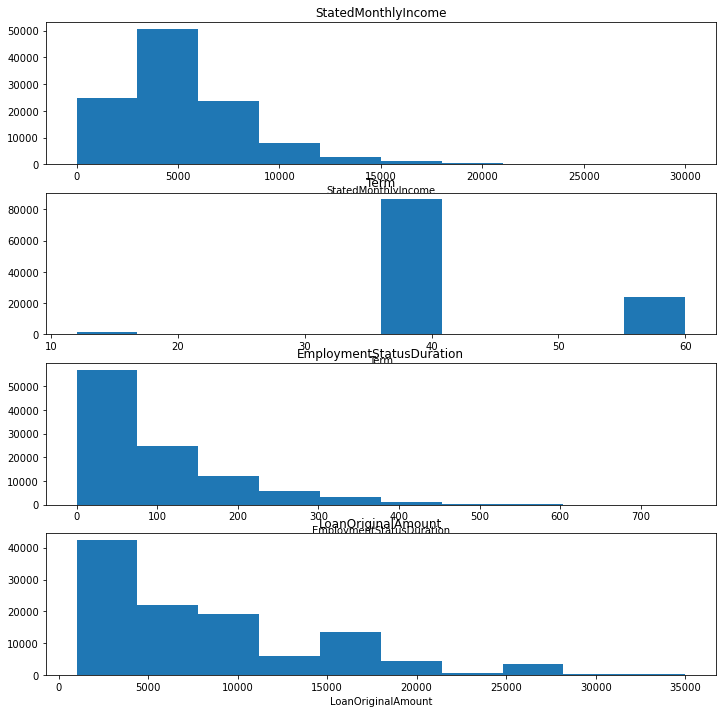

In [303]:
fig,ax=plt.subplots(nrows=4,figsize=[12,12])
colonne = ["StatedMonthlyIncome","Term","EmploymentStatusDuration","LoanOriginalAmount"]
for i in range(len(colonne)):
    col=colonne[i]
    #bins = np.arange(min(data_pret_etudes[col]),max(data_pret_etudes[col]+100,100))
    ax[i].hist(data=data_pret_etudes,x=col)
    ax[i].set_xlabel(col)
    ax[i].set_title(col)

On peut remarquer que les variables LoanOriginalAmount et EmploymentStatusDuration on presque la meme distribition.
On voit aussi la pluspart des données sont placées a l'extreme gauche  ce qui suggere quelques forte valeur aberrantes sur la droite. 
on etudiera si ces valeurs on va les supprimer ou garder par la suite
Pour la colonne StatedMonthlyIncome on peut voir que la majeur partie de ces données se trouve avant 30000 on peut les supprimer parceque sont des valeurs aberantes .

<AxesSubplot:xlabel='StatedMonthlyIncome'>

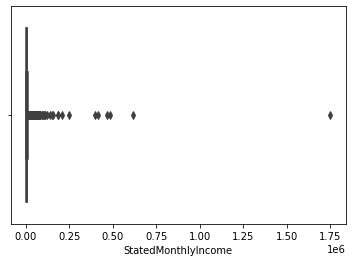

In [280]:
# tracer de la boxplot pour voir les valeur abberante
sns.boxplot(data=data_pret_etudes,x='StatedMonthlyIncome')

On voit ici que il y'a trop de valeur qui depasse largement les valeur normale de valeur etonnament grandez

In [281]:
data_pret_etudes.query('StatedMonthlyIncome >30000').shape[0]

314

On voit que sur l'ensemble de notre jeux de donnée seule 314 on un revenu superieur a 30000. Donc on peut les supprimé pour l'analyse

In [282]:
#Suppression de valeurs StatedMonthlyIncome  plus grand que 30000
data_pret_etudes = data_pret_etudes.query('StatedMonthlyIncome <= 30000')

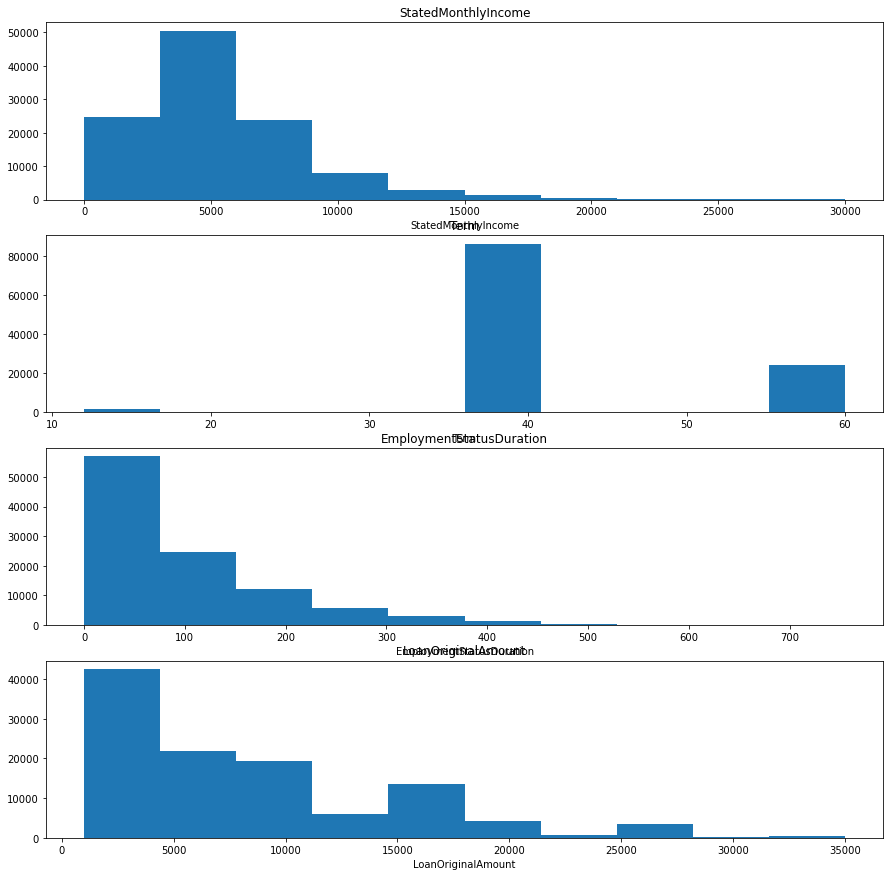

In [304]:
#Re tracage des graphes
fig,ax=plt.subplots(nrows=4,figsize=[15,15])
colonne = ["StatedMonthlyIncome","Term","EmploymentStatusDuration","LoanOriginalAmount"]
for i in range(len(colonne)):
    col=colonne[i]
    #bins = np.arange(min(data_pret_etudes[col]),max(data_pret_etudes[col]+100,100))
    ax[i].hist(data=data_pret_etudes,x=col)
    ax[i].set_xlabel(col)
    ax[i].set_title(col)

Ici la repartion est un peut plus coherente pour la variable StatedMonthluincome

> Pour la colonne IsBorrowerHomeowner

<AxesSubplot:ylabel='IsBorrowerHomeowner'>

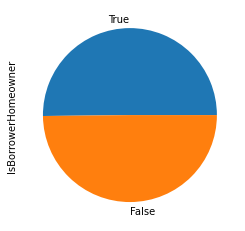

In [284]:
#Repartion de la variable 
data_pret_etudes.IsBorrowerHomeowner.value_counts().plot(kind="pie")

On n'a a peut pres le meme nombre de valeur true que false dans sur notre colonne IsBorrowerHomeowner

> Pour la colonne Occupation Regardons la distribition

Text(0.5, 1.0, 'diagramme en barre des Occupation')

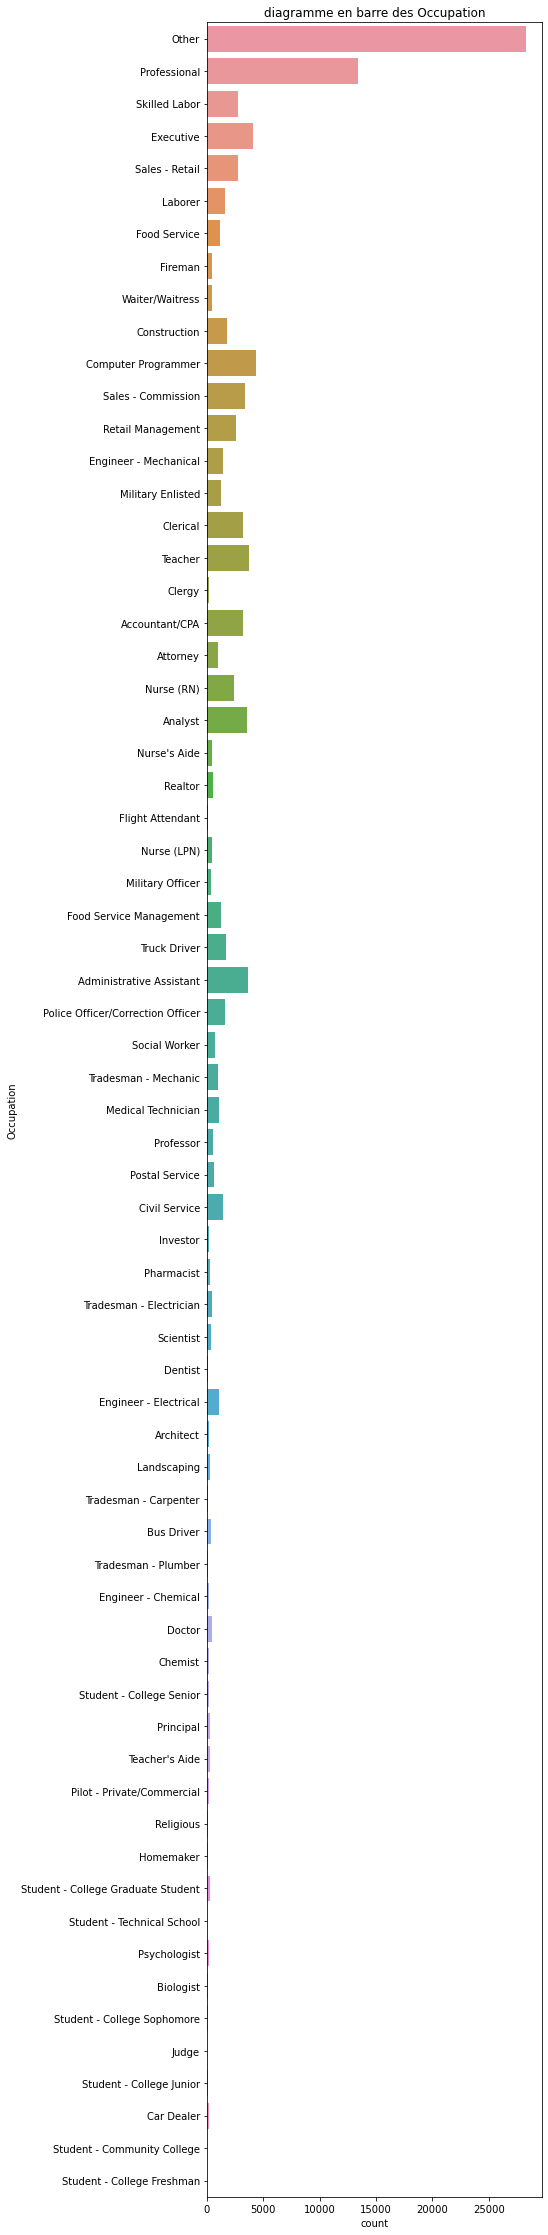

In [285]:
#tracons le diagramme en barre de la colonne occupation 
plt.figure(figsize=(6,40))
sns.countplot(data=data_pret_etudes,y='Occupation')
plt.title("diagramme en barre des Occupation")

On remarque que Other et Professional sont les plus representer dans notre jeux de données. Et beaucoup de classe on de valeurs valeurs proche de zero.

> Regardons la distribition de la variable CurrentCreditLines

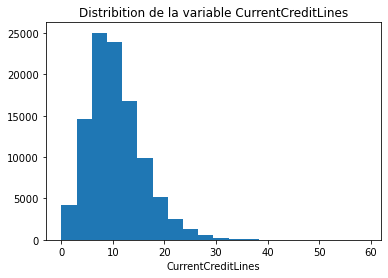

In [286]:
#Tracer de la distribition 
plt.hist(x='CurrentCreditLines',data=data_pret_etudes,bins=20)
plt.xlabel('CurrentCreditLines')
plt.title('Distribition de la variable CurrentCreditLines')
plt.show()

La variable CurrentCreditLines esr unimodal avec un distribution asymetriques inclinée vers la droite .Donc on n'a peut etre de trop grand valeur ou des valeur abberante 

In [287]:
len(data_pret_etudes.LoanStatus.unique())


12

### Discutez de la distribution de votre/vos variable(s) d'intérêt. Y avait-il des points inhabituels ? Avez-vous eu besoin d'effectuer des transformations ?

1. Pour la variable  BorrowerAPR : le taux annuel effectif global(TAEG) de l'emprunteur pour le pret. On voit qu'il presente beaucoup de pic est avec le plus grand qui se situe a 0.35 . Il y'a des point inhabituels avec des valeurs qui depasssent la normale vers 0.42 . On n'a pas effectué des transformations. 

2. Pour la variable ProsperScore : Un score de risque personnalisé construit a partir des données historiques de Prosper . Tout les classe sont bien representé  et la classe dominante est la classe 4 suivie de 6 et de 8. On remarque qu'il y'a des scores de 11 dans notre jeux de données alors que le sccore maximal est de 10. Les transformation effectués on n'a supprimer les scores de 11 dans notre dataset parceque c'est contraductoire a la description de la variable .
3. Pour la variable LoanStatus : Status actuel du pret le status des pres le plus representé est Current . On ne voit pas de valeur inhabbituels et on n'a pas eux a effectué de transformation .



### Parmi les caractéristiques que vous avez étudiées, y avait-il des distributions inhabituelles ? Avez-vous effectué des opérations sur les données pour les mettre en ordre, les ajuster ou en modifier la forme ? Si oui, pourquoi l'avez-vous fait ?

En etudiant la variables StatedMonthlyIncome on remarque que ily'avait des valeurs trop grands et la distribution etait incliné vers la droite et la pluspart des valeurs sont inferieur a 30000. Qui sont donc considere comme des valeurs aberante pour notre etude et on voit que c'est seulement 314 personnes sur l'ensemble des données.
Et la plus part des distribution ne sont pas symetrique et elles sont inclinés vers la droite .
On n'a effectué des changements de type dans notre dataset pour classer les variables catégoriel (EmploymentStatus,ProsperRating (Alpha)).On n'a pas effectué de modification pour ces variables.

## Exploration bivariée



Pour commencer , on va examiner les correlation par paires presentes entre les variables quantitatives

In [288]:
variable_num=["LoanOriginalAmount","BorrowerAPR","StatedMonthlyIncome",'CurrentCreditLines','EmploymentStatusDuration','BorrowerRate']
variable_cat= ["Term",'ProsperRating (Alpha)','IsBorrowerHomeowner','Occupation','LoanStatus','EmploymentStatus','ListingCategory (numeric)','ProsperScore']

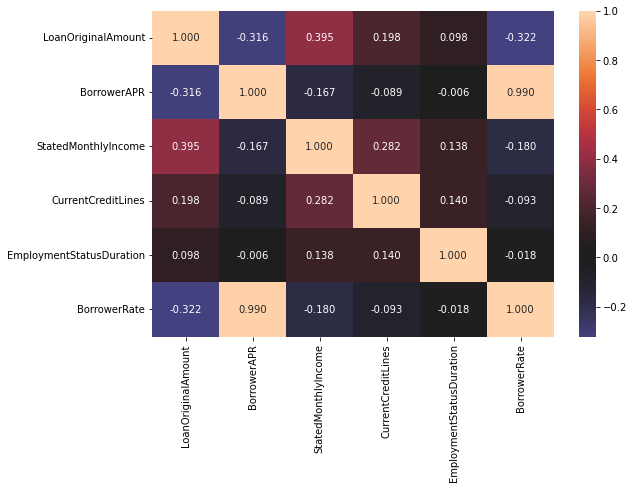

In [289]:
# Tracer de la correlation 
plt.figure(figsize=(9,6))
sns.heatmap(data_pret_etudes[variable_num].corr(),annot=True,fmt=".3f",center=0)
plt.show()

On voit que les correlation sont assez faible dans l'ensemble et voit aussi que la correlation entre BorrowerAPR et BorrowerRate est proche de 1  aussi on vois que la correlation entre BorrowerAPR et LoanOriginalAmount ont un correlation negatif avec une valeur de -0.322.


> Tracons la matrice de correlation de l'ensemble de notre dataset

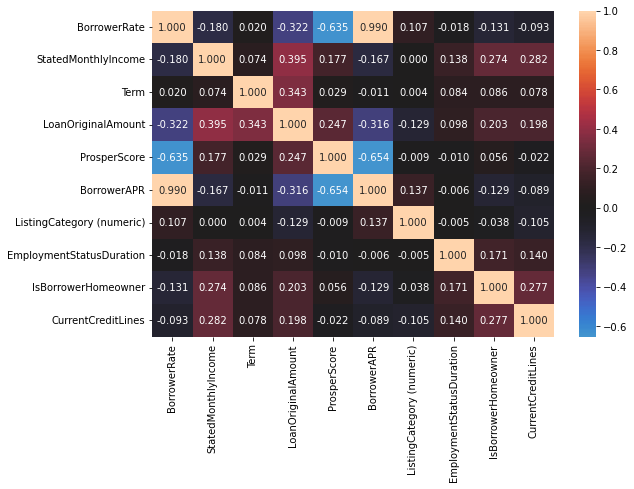

In [290]:
# Tracer de la correlation 
plt.figure(figsize=(9,6))
sns.heatmap(data_pret_etudes.corr(),annot=True,fmt=".3f",center=0)
plt.show()

> On remarque ici que le score est corrolé negativement avec BorrowerRate avec une valeur de -0.635 , le score a une coleration positive avec LoanOriginalAmount avec une valeur de 0.247 . Elle est aussi correllé positivement avec BorrowerAPR ce qui peut se comprendre parceque BorrowerRate et BorrowerAPR sont fortement corrélé




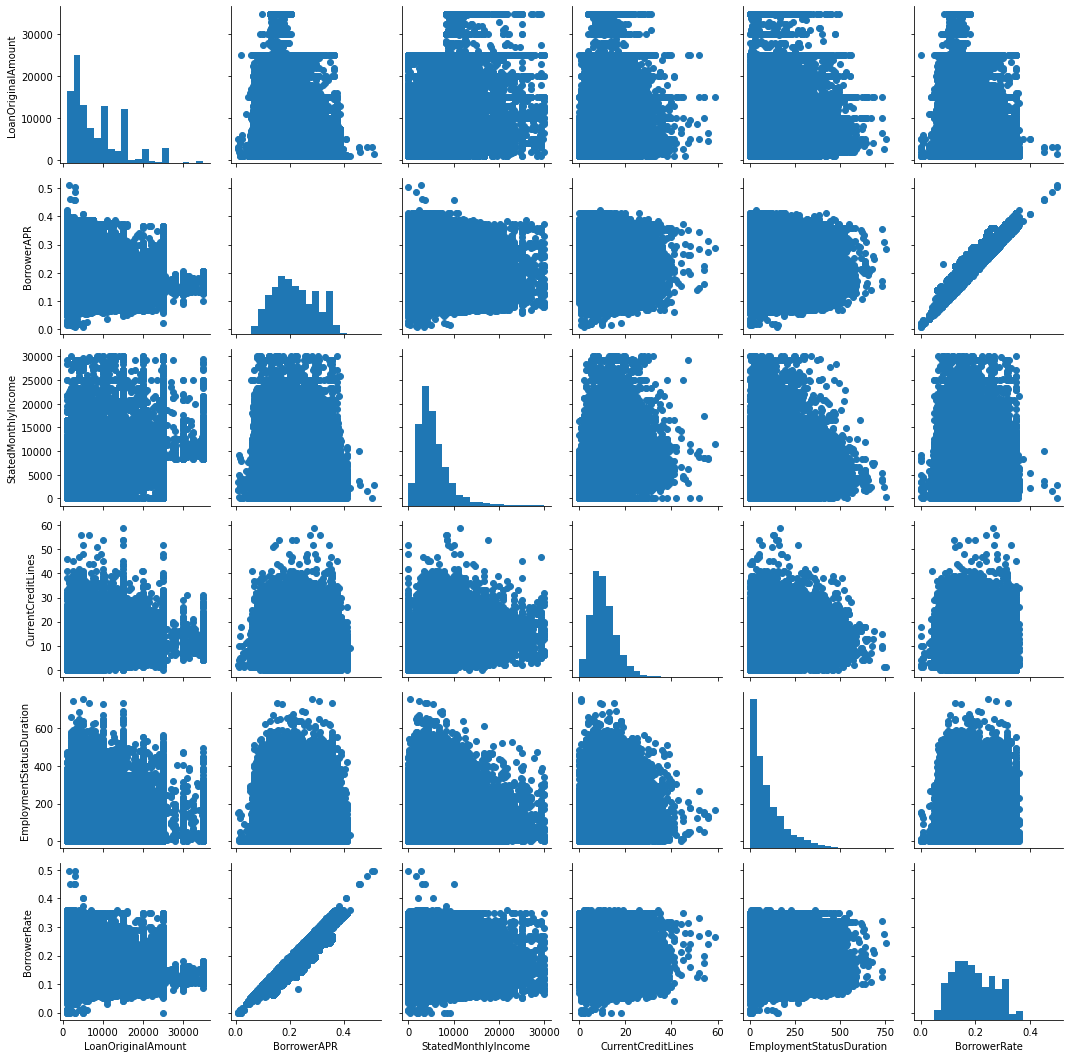

In [291]:
g= sns.PairGrid(data=data_pret_etudes,vars=variable_num)
g = g.map_diag(plt.hist,bins=20)
g.map_offdiag(plt.scatter)

Le graphe est un peut illisible essayons de diminuer les donnees

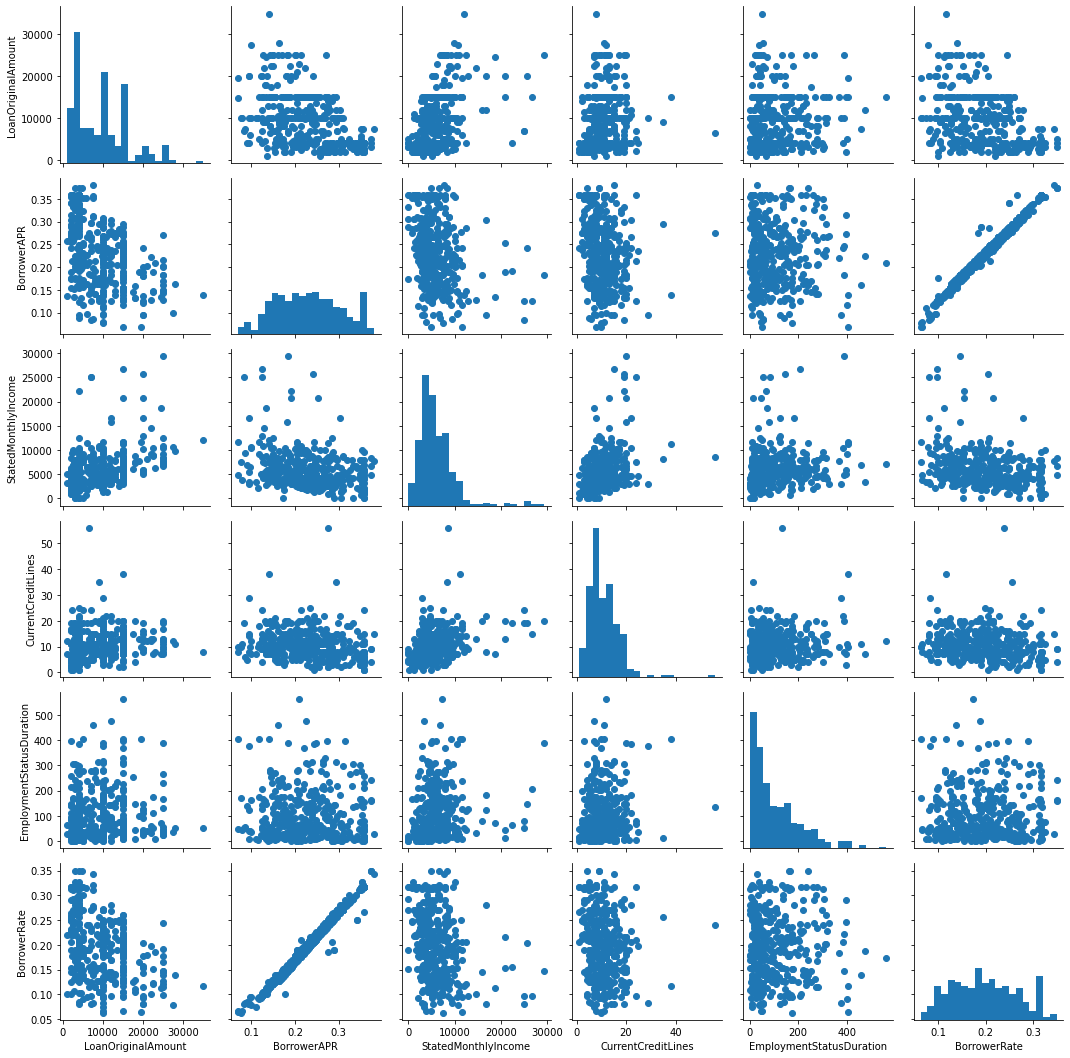

In [292]:
data_pret_etudes_diminuer = data_pret_etudes.sample(n=500,replace=False)
g= sns.PairGrid(data=data_pret_etudes_diminuer.dropna(),vars=variable_num)
g = g.map_diag(plt.hist,bins=20)
g.map_offdiag(plt.scatter)

Ici on peut voir les forte correlation entre BorrowerRate et BorrowerAPR . Les distribution sur les diagonal sont tous incliné a droite

Regardons maintenant la relation de borrowerAPR ,CurrentCreditLines , LoanOriginalAmount,EmploymentStatusDuration avec les variable categoriel

<Figure size 2880x1440 with 0 Axes>

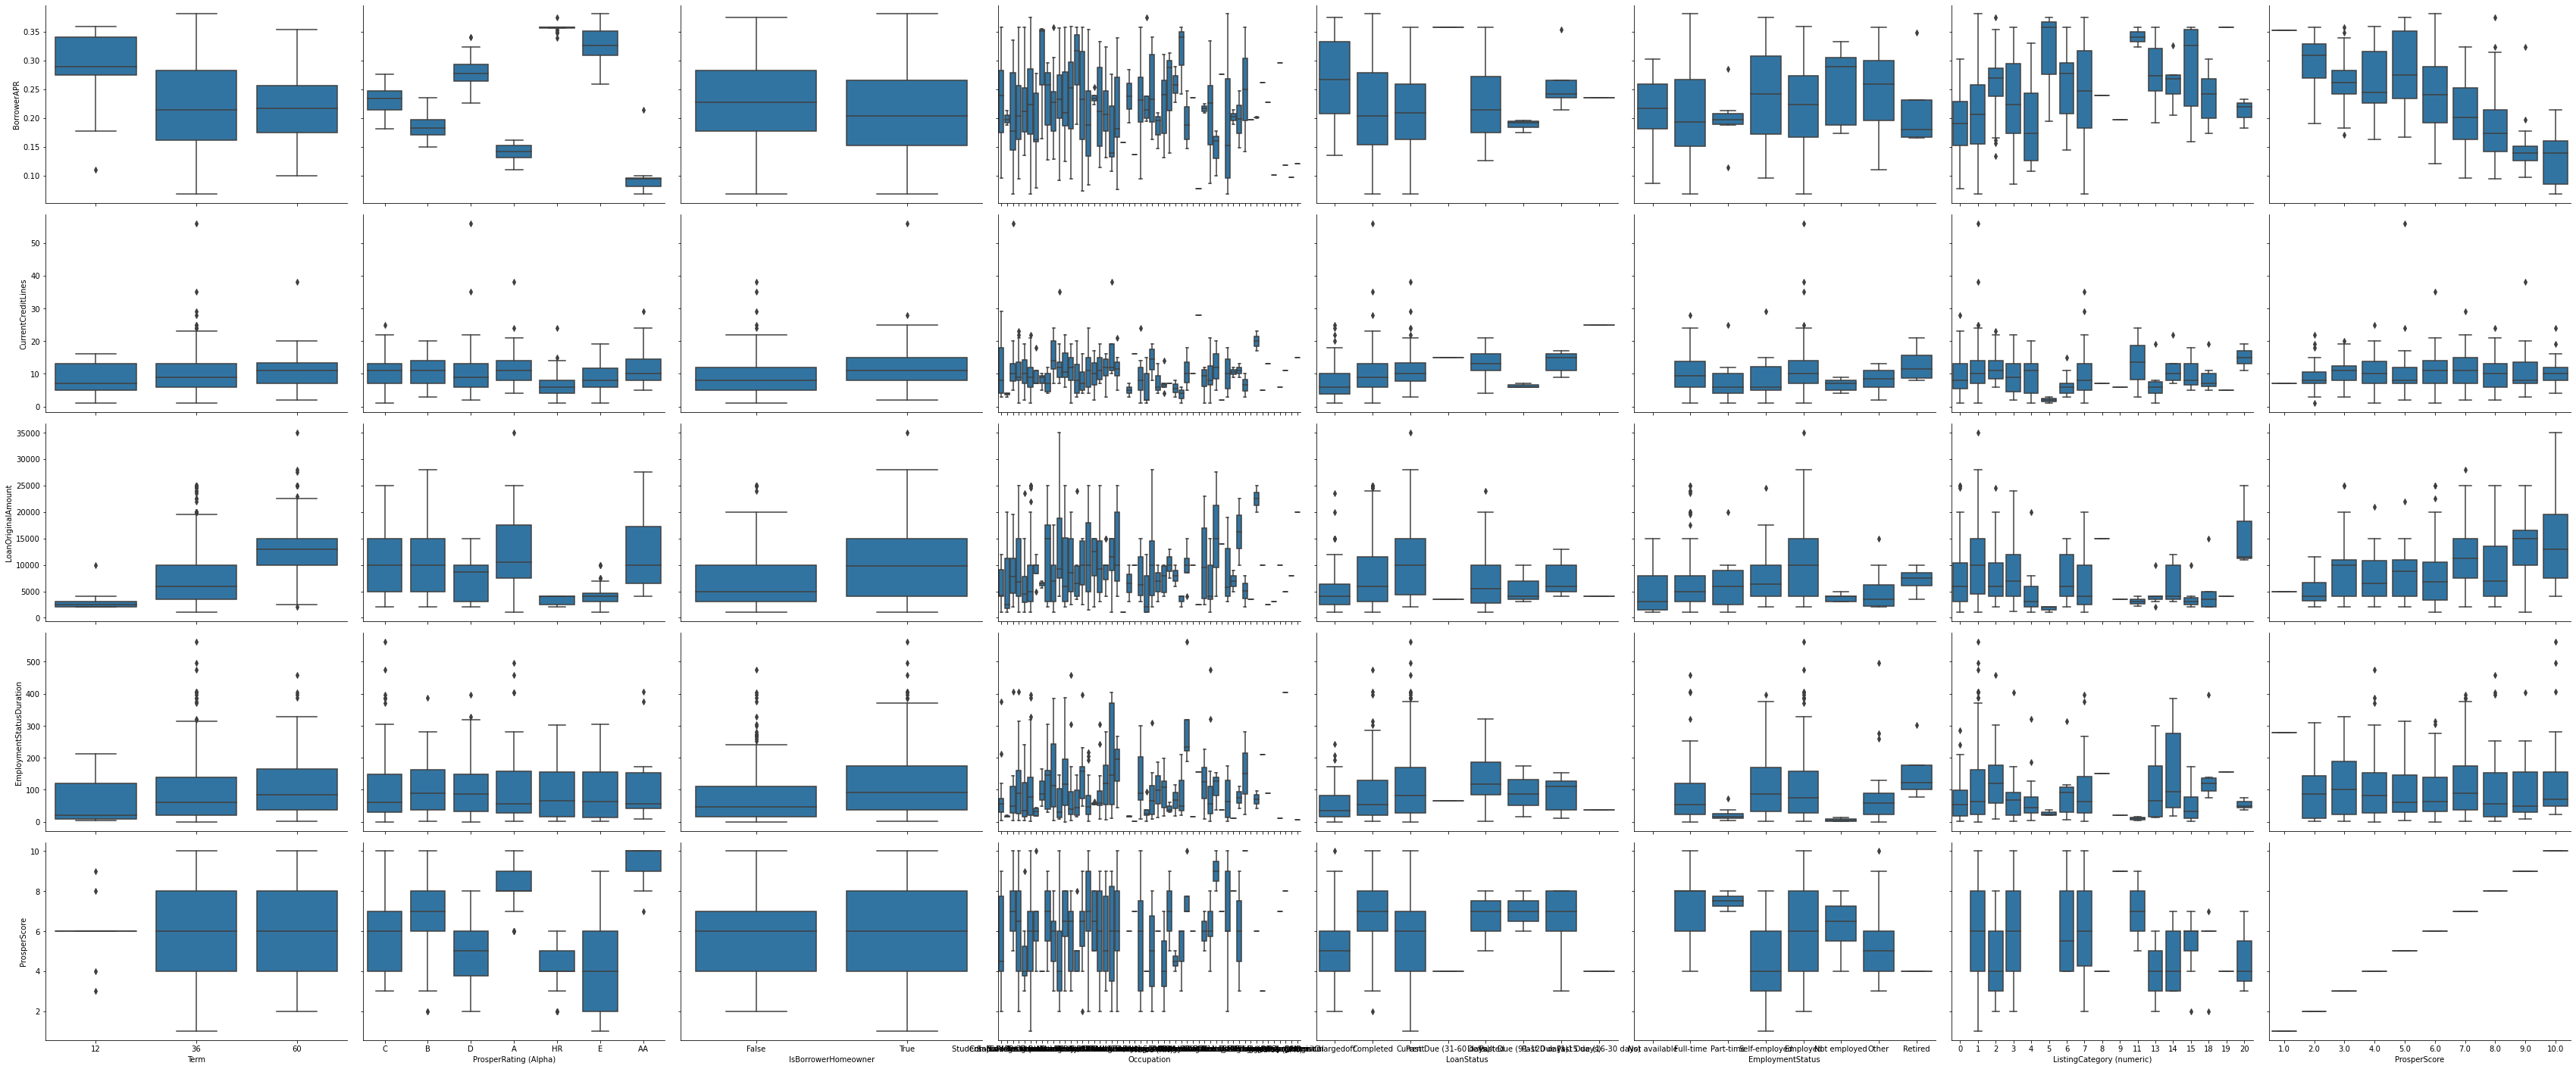

In [293]:
def boxgrid(x,y,**kwargs):
    color = sns.color_palette()[0]
    sns.boxplot(x=x,y=y,color=color)

plt.figure(figsize=(40,20))
g = sns.PairGrid(data = data_pret_etudes_diminuer,y_vars=['BorrowerAPR',"CurrentCreditLines",'LoanOriginalAmount',"EmploymentStatusDuration",'ProsperScore'],x_vars=variable_cat,height=4,aspect=1.5 )
g.map(boxgrid)

Le graphe est un peut confus on peut diminuer les variables categorielles pour essayer d'un voir plus claire


In [294]:
variable_cat__dim = ['Term','ProsperRating (Alpha)','EmploymentStatus','IsBorrowerHomeowner']

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

<Figure size 2880x1440 with 0 Axes>

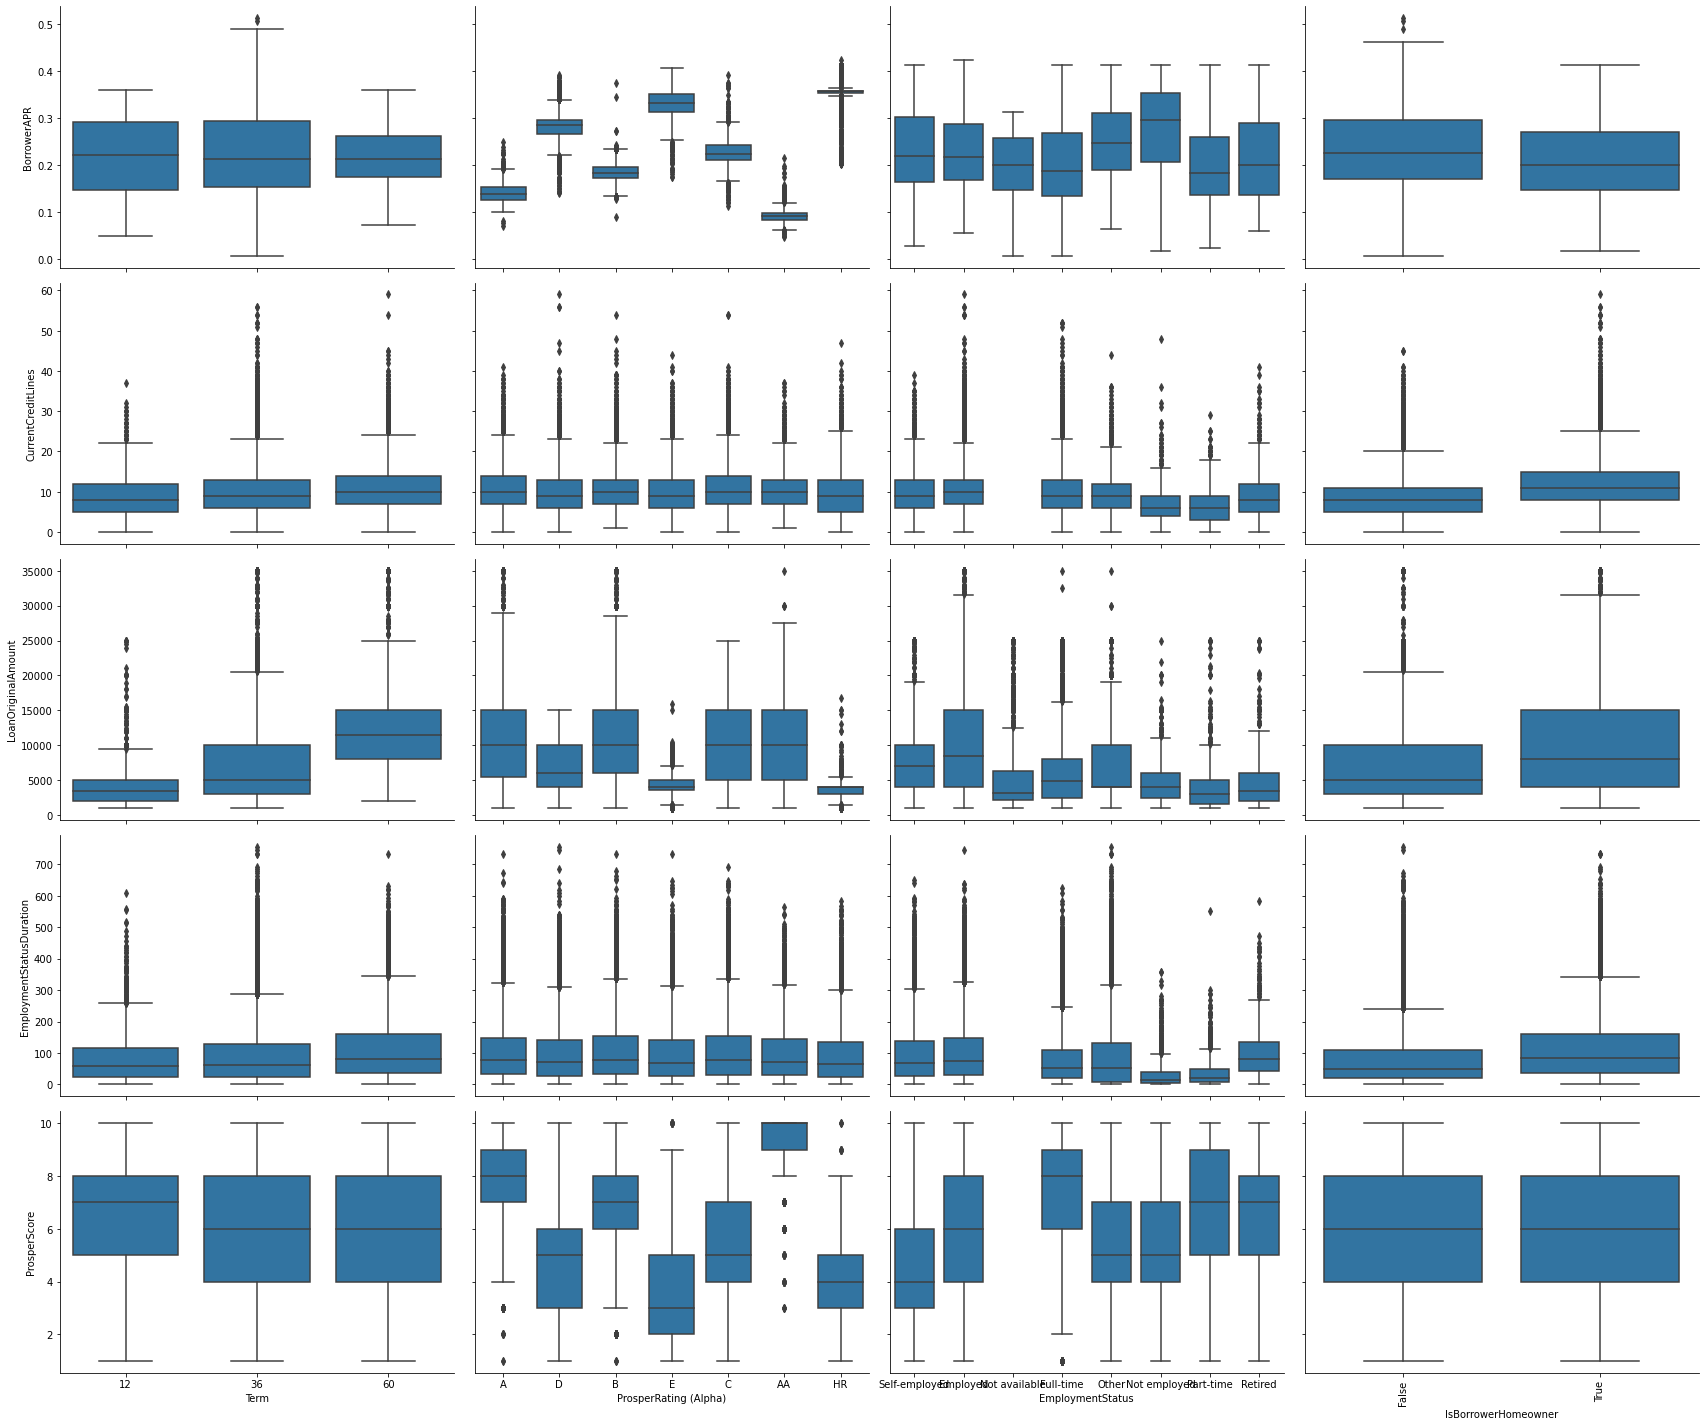

In [295]:
#Retracer du meme graphique
plt.figure(figsize=(40,20))
g = sns.PairGrid(data = data_pret_etudes,y_vars=['BorrowerAPR',"CurrentCreditLines",'LoanOriginalAmount',"EmploymentStatusDuration",'ProsperScore'],x_vars=variable_cat__dim,height=4,aspect=1.5 )
g.map(boxgrid)
plt.xticks(rotation=90)

On peut voir que plus la durée est importante plus le montant est elevé.
Pour le score personnalisé on constate que les personnes avec une ProsperRating (Alpha) de AA on une score de 10 et ont le TAEG les plus faibles et les personnes avec des score faibles ont une ProsperRating (Alpha) de E .
On constate que les personnes other et not employed ont des taux (TAEG) sont plus elevé.
Avec les personnes qui on un garantie ont des taux plus faibles en generale.


> Regardons les relation entre les variables categorielles

<AxesSubplot:xlabel='ProsperScore', ylabel='count'>

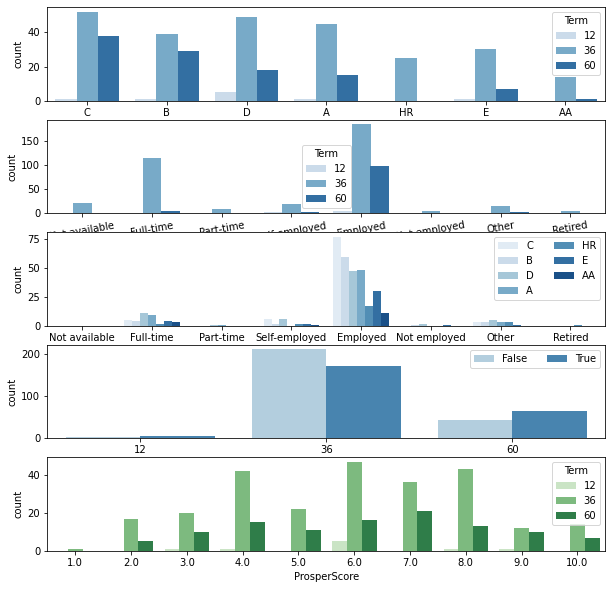

In [296]:
plt.figure(figsize=(10,10))

#Comparaison entre ProsperRating (Alpha) et Term
plt.subplot(5,1,1)
sns.countplot(data=data_pret_etudes_diminuer,x='ProsperRating (Alpha)',hue= 'Term',palette='Blues')
#Comparaison entre Term et EmploymentStatus
plt.subplot(5,1,2)
sns.countplot(data=data_pret_etudes_diminuer,x='EmploymentStatus',hue='Term',palette='Blues')
plt.xticks(rotation=10)
# Comparaison entre EmploymentStatus et Term 
plt.subplot(5,1,3)
sns.countplot(data=data_pret_etudes_diminuer,x='EmploymentStatus',hue='ProsperRating (Alpha)',palette='Blues')
plt.legend(loc=1,ncol=2)
plt.subplot(5,1,4)
sns.countplot(data=data_pret_etudes_diminuer,x='Term',hue='IsBorrowerHomeowner',palette='Blues')
# definition des axes et reorganisation des legend
plt.legend(loc=1,ncol=2)
plt.subplot(5,1,5)
sns.countplot(data=data_pret_etudes_diminuer,x='ProsperScore',hue='Term',palette='Greens')

On vois que le ProsperRating (Alpha) la durée de la plus part des categories est de 36 mois
Et les personne avec un status d'employed emprunt avec une durée de 36mois la plus part du temps  de meme pour le ProsperRating (Alpha)  

Regardons la distribution entre le montant initiale du pres et le TEAG

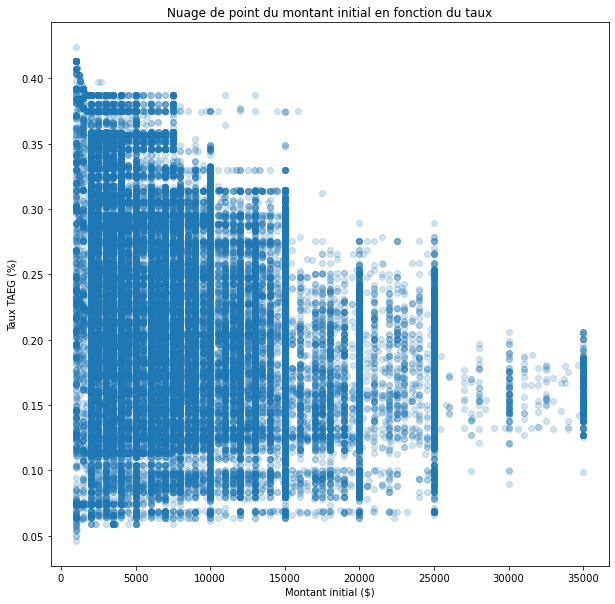

In [297]:
plt.figure(figsize=(10,10))
plt.scatter(data=data_pret_etudes.dropna(),y='BorrowerAPR',x='LoanOriginalAmount',alpha=0.2)
plt.xlabel('Montant initial ($)')
plt.ylabel('Taux TAEG (%)')
plt.title("Nuage de point du montant initial en fonction du taux")
plt.show()

On peut voir que plus le montant est petit plus le taux est important . Donc si le montant augmente le taux diminue defois

Regardons la distribution de la variable ProsperScore et CurrentLineCredits

<AxesSubplot:xlabel='count', ylabel='CurrentCreditLines'>

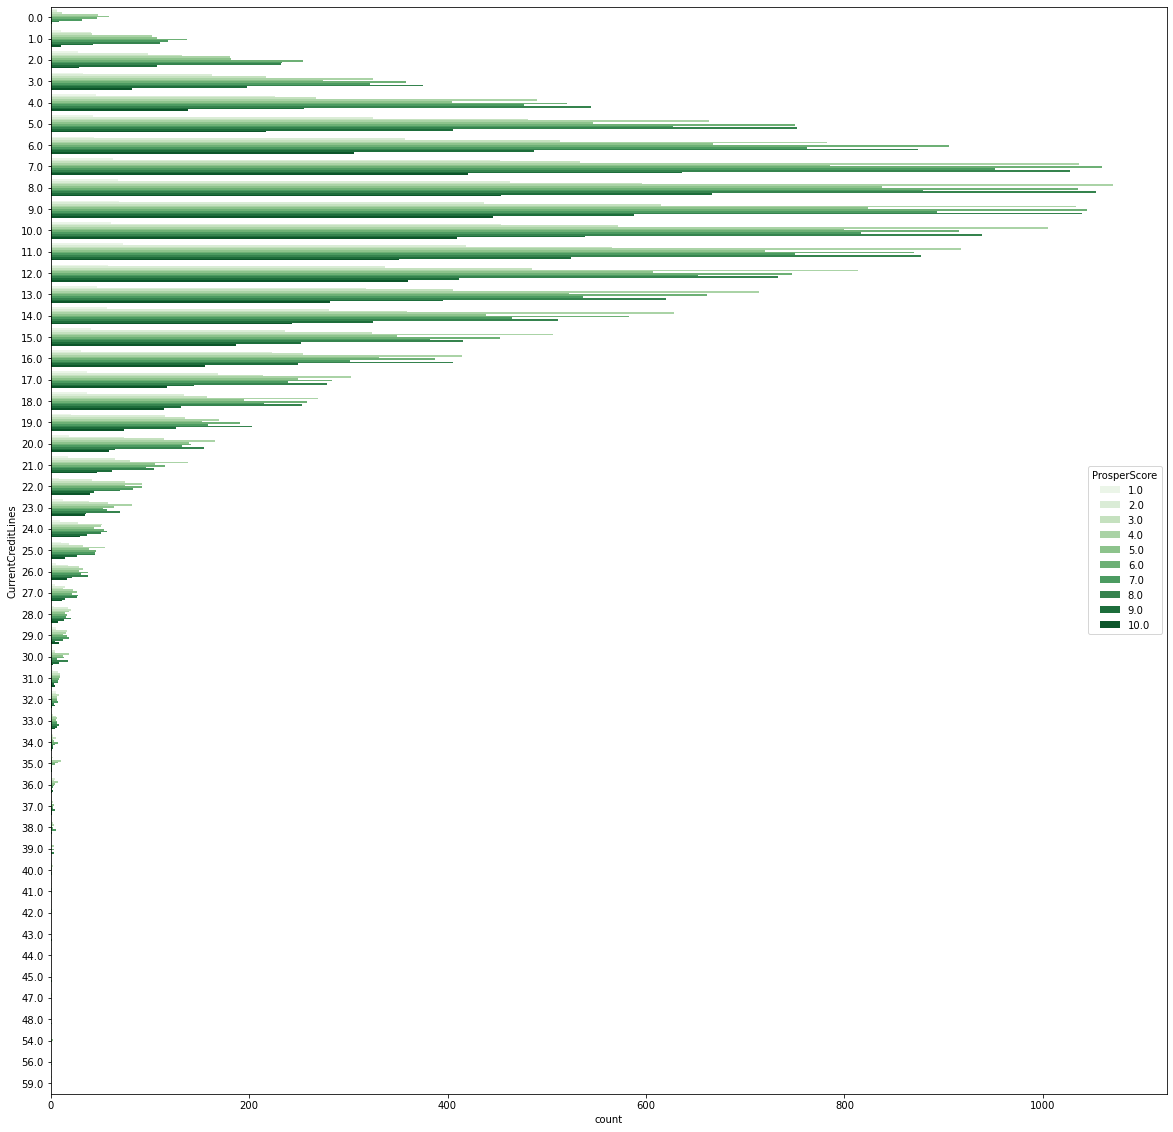

In [298]:
#Tracer de la distribution 
plt.figure(figsize=(20,20))
sns.countplot(data=data_pret_etudes.dropna(),hue='ProsperScore',y='CurrentCreditLines',palette='Greens')

Ici on peut voir que les personnes avec des lignes de credit de 9 on moins une bonnes scores.
Et beaucoup de personnes on des ligne de credit faibles

### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Comment la ou les caractéristiques qui vous intéressent ont-elles varié par rapport aux autres caractéristiques de l'ensemble de données ?

Pour le score on remarque que plus le score est faibles plus le BorrowerRate est important car leur correlation est negative  et le ProsperRating (Alpha) influencie aussi sur le score .
Pour le TAEG on voit une correlation negatif aussi avec le montant initiale du pret plus le montant est petite plus le taux est elevé .Le taux aussi varie en fonction de le ProsperRating (Alpha).
On constate aussi que les personnes other et not employed ont des taux (TAEG) sont plus elevé.

### Avez-vous observé des relations intéressantes entre les autres caractéristiques (pas la ou les caractéristiques principales) ?

On peut voir que la durée du pres plus elle est importante plus le montant du pres initiale est elevé.
Et le ProsperRating (Alpha) la duree la plus representer dans les classes est de 36 mois.

## Exploration multivariée



On va essayer de voir la relation entre la durée du pres le montant initial et le taux du pres 

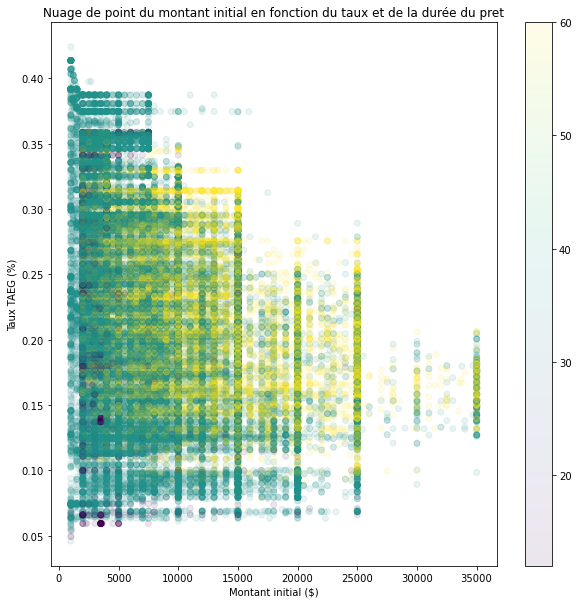

In [299]:
plt.figure(figsize=(10,10))
plt.scatter(data=data_pret_etudes.dropna(),y='BorrowerAPR',x='LoanOriginalAmount',alpha=0.1,c='Term')
plt.colorbar()
plt.xlabel('Montant initial ($)')
plt.ylabel('Taux TAEG (%)')
plt.title("Nuage de point du montant initial en fonction du taux et de la durée du pret")
plt.show()

Ici on voit que les pres qui corresponds au montant les plus élevé et on presque les taux les plus faibles.
Comme le graphe est un peut illisible esseyons avec un FacetGrid

<Figure size 720x720 with 0 Axes>

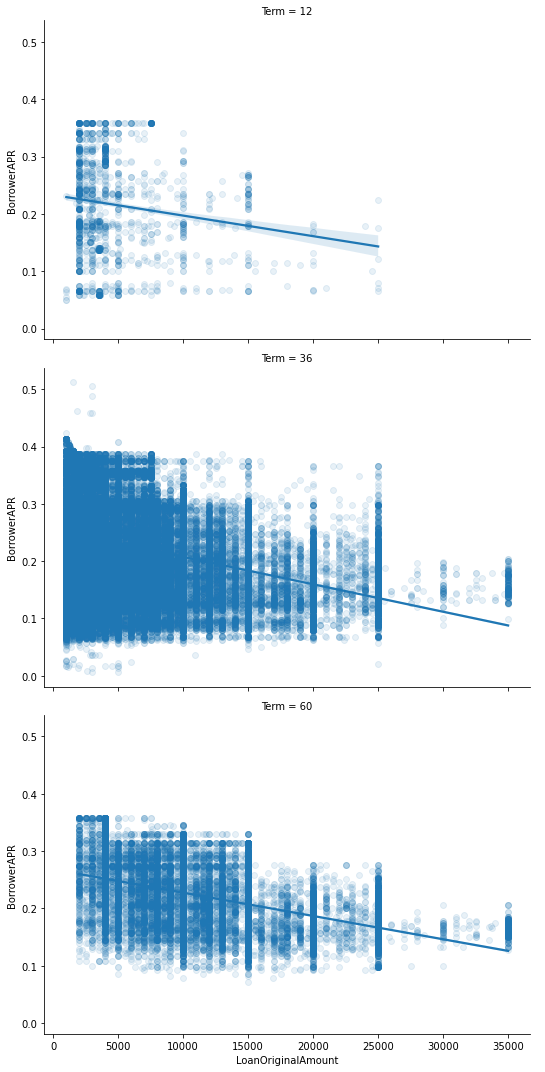

In [300]:
plt.figure(figsize=(10,10))
g= sns.FacetGrid(data=data_pret_etudes,col='Term',col_wrap=1 ,aspect=1.5,height=5)
g.map(sns.regplot,'LoanOriginalAmount','BorrowerAPR',x_jitter=0.04,scatter_kws={'alpha':0.1})
g.add_legend();

Comme on le vois plus le montant augment le taux diminue.
Et les dettes les plus importante on une duree de 60mois

Regardons la relation entre duree le score Alpha et le taux

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='BorrowerAPR'>

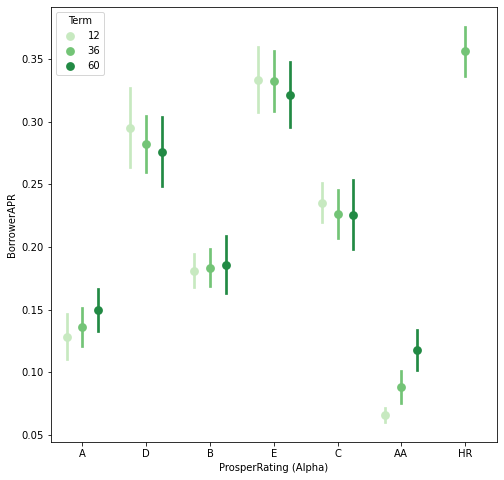

In [301]:
plt.figure(figsize=(8,8))
sns.pointplot(data=data_pret_etudes,x='ProsperRating (Alpha)',y='BorrowerAPR',hue='Term',palette='Greens',linestyles='',dodge=0.5,ci='sd')

On voit que pour les personnes avec un scoreRating de AA le taux est plus faible et dans ce meme categorie on vois que la duree augment le taux augmente ce qui n'est pas le cas pour personnes avec un scoreRating de D.
Les personnes avec un scoreRating de HR s'il emprunte avec une durée de 36 mois on les taux les plus elevé a payer.

On vas voir le Score personnaliser en fonction de la status du demandeur et du temps pour voir ou confirmé est ce qu'il exite cette relation qu'on avait cité en haut

<Figure size 720x720 with 0 Axes>

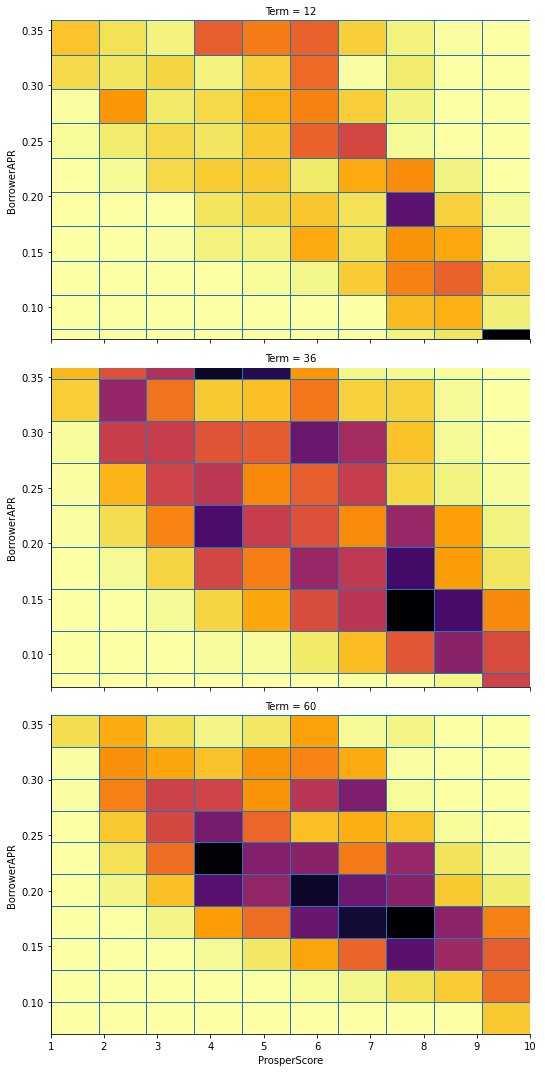

In [302]:
plt.figure(figsize=(10,10))
g= sns.FacetGrid(data=data_pret_etudes.dropna(),col='Term',col_wrap=1 ,aspect=1.5,height=5)
g.map(plt.hist2d,'ProsperScore','BorrowerAPR',cmap = 'inferno_r')
g.add_legend();

Dans cette carte thermiques a facettes on peut voir la relation le taux le score personnalisé et le temps 

### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Y avait-il des caractéristiques qui se renforçaient mutuellement pour ce qui est de l'examen de votre ou vos caractéristiques d'intérêt ?

Le taux d'un pret on n'a vu que sa depender du temps et de la montant aussi avec cette etude on peut voir que le taux varie non seulement en fonction du temps mais aussi du ProsperRatin (Alpha) . Et du statuts du demandeur aussi.

Pour le score personnalisé on vois que le temps et le taux appliquée on une dependance tres forte 



### Y avait-il des interactions intéressantes ou surprenantes entre les caractéristiques ?

En regardant le graphe ponctuels il ne semble pas y avoir d'effet d'interaction entre le score alpha  le temps et le taux .
Les taux les plus faibles corresponds a des personnes qui ont un score alpha de AA et une duree de pret de 36 mois  
La carte thermique indique que les variables meme si elles sont pas trop dependantes aussi.
 

## Conclusions
 On a explorer notre jeux de donnée  effectuer des transformation visualiser la distribuytion des graphes de facons univarié ou on n'a trouvé que le taux se presente sous forme de variable avec plusieur pic . Et le score personnalisé qui est le score que la banque donne a ses emprunteurs presenté quelques valeur incoherentes . 
 Apres on a fait une etude bivarié pour voir la retation de correlation negatif entre la
 et taux et le montant emprunter , aussi le score avait une correlation avec le montant initial du pret.
 Et enfin on n'a fait une etude multie varié des variables pour voir la dependance de la variable taux en fonction du temps et du score alpha de la banque et le tzmps de 36mois avais les taux les plus faibles mais aussi les score le plus bon.